#  FEATURE ENGINEERING


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv('training.csv')

df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


Lets start by removing `EventId`, popping  `Weight` and `Label` into a separate series

In [7]:
df.drop('EventId',axis=1,inplace=True)
Weights=df.pop('Weight')
y=df.pop('Label')   ##target values

In [8]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


## Imputations

The missing values in `DER_mass_MMC` can be imputed using a Linear Regressor or Random Forest Regressor with independent varaibles `DER_mass_vis` and `DER_deltar_tau_lep` because of their high correlation to the dependent variable

In [24]:
def forest_imputer(DF):
    
    P=RandomForestRegressor(n_estimators=100,n_jobs=4).fit(X=DF[DF.DER_mass_MMC!=-999][['DER_deltar_tau_lep','DER_mass_vis']],
       y=DF[DF.DER_mass_MMC!=-999].DER_mass_MMC).predict(DF[DF.DER_mass_MMC==-999][['DER_deltar_tau_lep','DER_mass_vis']])
    
    DF1=DF.copy()
    DF1.DER_mass_MMC[DF1.DER_mass_MMC==-999]=P
    return DF1

In [20]:
def linear_imputer(DF):
    
    P=LinearRegression().fit(X=DF[DF.DER_mass_MMC!=-999][['DER_deltar_tau_lep','DER_mass_vis']],
       y=DF[DF.DER_mass_MMC!=-999].DER_mass_MMC).predict(DF[DF.DER_mass_MMC==-999][['DER_deltar_tau_lep','DER_mass_vis']])
    
    DF1=DF.copy()
    DF1.DER_mass_MMC[DF1.DER_mass_MMC==-999]=P
    return DF1

In [26]:
df1=forest_imputer(df)

/tmp/ipykernel_5739/438418694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1.DER_mass_MMC[DF1.DER_mass_MMC==-999]=P


In [21]:
df2=linear_imputer(df)

/tmp/ipykernel_5739/2418058539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1.DER_mass_MMC[DF1.DER_mass_MMC==-999]=P


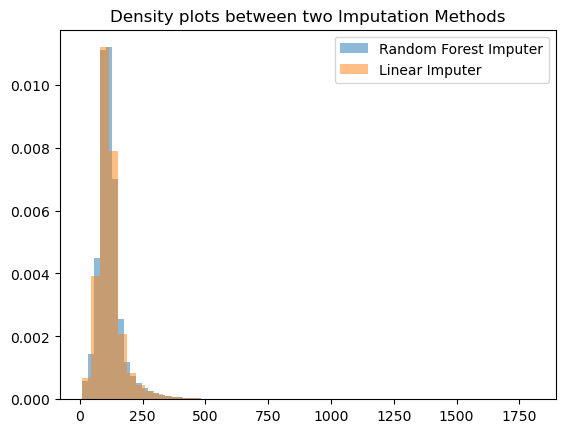

In [78]:
plt.figure()
plt.hist(x=df1.DER_mass_MMC,alpha=0.5,bins=50,density=1)
plt.hist(x=df2.DER_mass_MMC,alpha=0.5,bins=50,density=1)
plt.legend(labels=['Random Forest Imputer','Linear Imputer'])
plt.title('Density plots between two Imputation Methods')
plt.show()

- Both the imputation techiniques appear to produce identical density plots
- The Random Forest imputator was computationally expensive
- Therefore its pragmatic to go with the Linear Imputer

In [79]:
df.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

Now let us drop `PRI_jet_leading_phi` and `PRI_jet_subleading_phi` since they does not seem to have any affect of the target and contains too many missing values

In [80]:
df.drop(['PRI_jet_leading_phi','PRI_jet_leading_phi'],axis=1,inplace=True)

We can also encode `Label` ordinally with 's' = 1 and  'b' = 0

In [83]:
y=np.where(y.values=='s',1,0)

In [84]:
y

array([1, 0, 0, ..., 1, 0, 0])

**All the above steps will be abstracted away to `cust_func.py`**